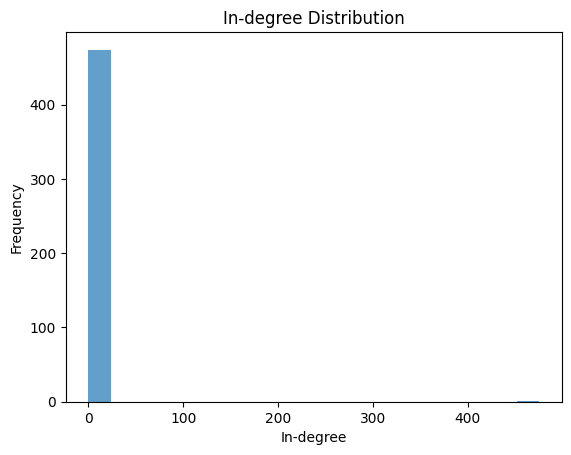

KS Statistic: 0.4968421052631579
P-value: 1.2737512031016912e-53


In [17]:
import networkx as nx
import numpy as np
from scipy.stats import ks_2samp
import json
import matplotlib.pyplot as plt

def load_network_from_json(json_file):
    """
    Load a directed graph from a JSON file.
    """
    with open(json_file, 'r') as file:
        data_list = json.load(file)

    G = nx.DiGraph()

    # Add nodes with usernames as attributes
    for i, data in enumerate(data_list):
        G.add_node(i, username=data["usernameList"])

    # Add edges with weights from inList
    for i, data in enumerate(data_list):
        for j, node in enumerate(data["inList"]):
            for k, in_node in enumerate(node):
                G.add_edge(in_node, i, weight=data["inWeight"][j][k])

    # Add edges with weights from outList
    for i, data in enumerate(data_list):
        for j, node in enumerate(data["outList"]):
            for k, out_node in enumerate(node):
                G.add_edge(i, out_node, weight=data["outWeight"][j][k])

    return G

# Rest of the code remains unchanged...

# Rest of the code remains unchanged...

def plot_in_degree_distribution(graph):
    """
    Plots the in-degree distribution of the graph.
    """
    in_degrees = [graph.in_degree(node) for node in graph.nodes]
    plt.hist(in_degrees, bins=20, alpha=0.7)
    plt.title("In-degree Distribution")
    plt.xlabel("In-degree")
    plt.ylabel("Frequency")
    plt.show()

def calculate_ks_statistic(graph):
    """
    Calculates the Kolmogorov-Smirnov (KS) D-statistic for the in-degree distribution.
    """
    in_degrees = [graph.in_degree(node) for node in graph.nodes]

    # Assuming you have a reference in-degree distribution (e.g., theoretical distribution)
    # Replace the following line with your actual reference distribution.
    reference_distribution = np.random.normal(loc=np.mean(in_degrees), scale=np.std(in_degrees), size=len(in_degrees))

    ks_statistic, p_value = ks_2samp(in_degrees, reference_distribution)

    return ks_statistic, p_value

# Parameters
json_file_path = 'congress_network_data.json'

# Load network from JSON file
network = load_network_from_json(json_file_path)

# Plot the in-degree distribution
plot_in_degree_distribution(network)

# Calculate KS statistic
ks_statistic, p_value = calculate_ks_statistic(network)

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


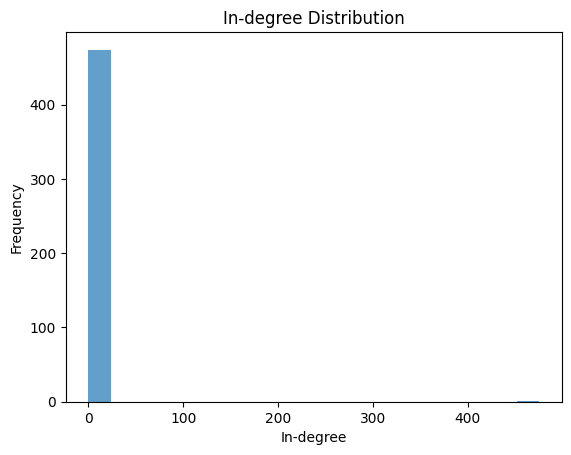

KS Statistic: 0.4926315789473684
P-value: 1.111691467561834e-52
Number of samples exceeds the number of nodes. Returning all nodes.


In [26]:
import networkx as nx
import numpy as np
from scipy.stats import ks_2samp
import json
import matplotlib.pyplot as plt
import random

def load_network_from_json(json_file):
    """
    Load a directed graph from a JSON file.
    """
    with open(json_file, 'r') as file:
        data_list = json.load(file)

    G = nx.DiGraph()

    # Add nodes with usernames as attributes
    for i, data in enumerate(data_list):
        G.add_node(i, username=data["usernameList"])

    # Add edges with weights from inList
    for i, data in enumerate(data_list):
        for j, node in enumerate(data["inList"]):
            for k, in_node in enumerate(node):
                G.add_edge(in_node, i, weight=data["inWeight"][j][k])

    # Add edges with weights from outList
    for i, data in enumerate(data_list):
        for j, node in enumerate(data["outList"]):
            for k, out_node in enumerate(node):
                G.add_edge(i, out_node, weight=data["outWeight"][j][k])

    return G

def random_node_sampling(graph, num_samples):
    """
    Perform random node selection sampling on a graph.

    Parameters:
    - graph: NetworkX graph
    - num_samples: Number of nodes to randomly select

    Returns:
    - List of randomly selected nodes
    """
    all_nodes = list(graph.nodes())

    if num_samples >= len(all_nodes):
        print("Number of samples exceeds the number of nodes. Returning all nodes.")
        return all_nodes

    sampled_nodes = random.sample(all_nodes, num_samples)
    return sampled_nodes

def save_graph_to_json(graph, filename):
    """
    Save a NetworkX graph to a JSON file.

    Parameters:
    - graph: NetworkX graph
    - filename: Name of the JSON file to save
    """
    data = nx.node_link_data(graph)

    with open(filename, 'w') as file:
        json.dump(data, file)

# Rest of the code remains unchanged...

# Parameters
json_file_path = 'congress_network_data.json'

# Load network from JSON file
network = load_network_from_json(json_file_path)

# Plot the in-degree distribution
plot_in_degree_distribution(network)

# Calculate KS statistic
ks_statistic, p_value = calculate_ks_statistic(network)

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Number of nodes to sample
num_samples = 1000

# Perform random node selection sampling
sampled_nodes = random_node_sampling(network, num_samples)

# Create a subgraph with only the sampled nodes and their neighbors
subgraph = network.subgraph(sampled_nodes)

# Save the subgraph to a new JSON file
save_graph_to_json(subgraph, 'randomly_selected_graph.json')


KS Statistic: 0.5452631578947369
P-value: 3.74623607629182e-65


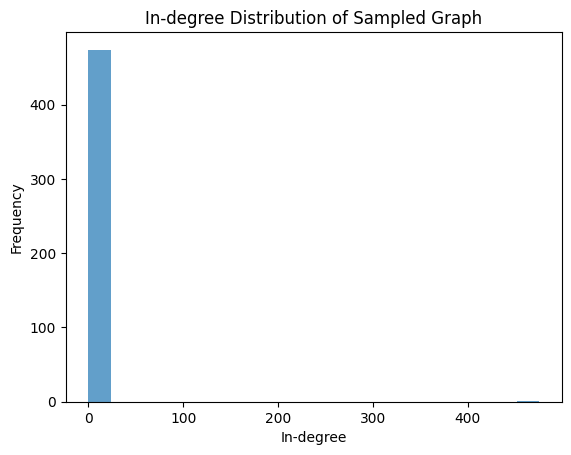

In [27]:
import networkx as nx
import numpy as np
from scipy.stats import ks_2samp
import json
import matplotlib.pyplot as plt

def calculate_ks_statistic(graph):
    """
    Calculates the Kolmogorov-Smirnov (KS) D-statistic for the in-degree distribution.

    Parameters:
    - graph: NetworkX graph

    Returns:
    - KS Statistic and p-value
    """
    in_degrees = [graph.in_degree(node) for node in graph.nodes]

    # Assuming you have a reference in-degree distribution (e.g., theoretical distribution)
    # Replace the following line with your actual reference distribution.
    reference_distribution = np.random.normal(loc=np.mean(in_degrees), scale=np.std(in_degrees), size=len(in_degrees))

    ks_statistic, p_value = ks_2samp(in_degrees, reference_distribution)

    return ks_statistic, p_value

def load_graph_from_json(json_file):
    """
    Load a graph from a JSON file.

    Parameters:
    - json_file: Path to the JSON file containing the graph data

    Returns:
    - NetworkX graph
    """
    with open(json_file, 'r') as file:
        data = json.load(file)

    graph = nx.json_graph.node_link_graph(data, directed=True)
    return graph

# Replace 'your_sampled_graph.json' with the path to your sampled graph JSON file
sampled_graph_json_file = 'randomly_selected_graph.json'
sampled_graph = load_graph_from_json(sampled_graph_json_file)

# Calculate KS statistic
ks_statistic, p_value = calculate_ks_statistic(sampled_graph)

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Optionally, you can plot the in-degree distribution
in_degrees = [sampled_graph.in_degree(node) for node in sampled_graph.nodes]
plt.hist(in_degrees, bins=20, alpha=0.7)
plt.title("In-degree Distribution of Sampled Graph")
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.show()
